In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

## Read data

In [7]:
data = pd.read_csv("../data/pd_speech_features.csv")
record_num, feature_num = data.shape

## Get X, Y

In [3]:
X = data.drop(columns=["id", "class"])
Y = data["class"]

## Scale the data

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

array([[ 0.96874225,  0.62764391,  0.2561442 , ..., -0.775137  ,
        -0.81472704, -0.36659507],
       [ 0.96874225,  0.12161952, -0.08043329, ..., -0.52664699,
        -0.58297219,  0.40039616],
       [ 0.96874225,  0.61795018, -0.34983882, ..., -0.75606253,
        -0.8043897 , -0.7809355 ],
       ...,
       [-1.03226633,  0.81336154,  0.3292009 , ..., -0.71674252,
        -0.79017671, -0.77287314],
       [-1.03226633,  0.54105055,  0.69591966, ..., -0.77132466,
        -0.82631929, -0.81173208],
       [-1.03226633,  0.3945807 ,  0.92284035, ..., -0.68658105,
        -0.84098293, -0.82811405]])

## PCA

In [17]:
pca = PCA(n_components=200)
X_new = pca.fit_transform(X_scaled)
X_new.shape

(756, 200)

## Split train test

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=((record_num-500)/record_num), random_state=192)

In [19]:
model = LogisticRegression(penalty=None, max_iter=20000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=20000, penalty=None)

In [20]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [21]:
acc = accuracy_score(Y_test, Y_pred)
con_mat = confusion_matrix(Y_test, Y_pred)

print(acc)
print(con_mat)

0.77734375
[[ 41  19]
 [ 38 158]]


## PCA but retain 80% of the data

- Init PCA class without specify the n_component (retain all the feature)

In [25]:
pca_new = PCA()
X0_new = pca_new.fit_transform(X_scaled)

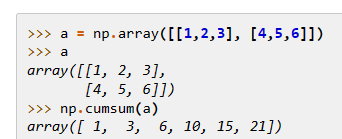

- calculate the number of components base on cummulative variance sum

In [35]:
cummulative_var_ratio = pca_new.explained_variance_ratio_.cumsum()
n_components = (cummulative_var_ratio >= 0.8).sum() + 1 # python!!
n_components

694

## Init PCA again

In [38]:
pca_new = PCA(n_components=n_components)
X0_new = pca_new.fit_transform(X_scaled)
X0_new.shape


(756, 694)

In [39]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0_new, Y, test_size=((record_num-500)/record_num), random_state=192)
X0_train

array([[ 7.37034323e+00,  7.81298970e+00, -9.26514345e-01, ...,
         7.92722532e-04, -9.03783145e-05, -6.46044195e-05],
       [ 1.34878724e+01, -8.17258765e+00,  3.16459643e+00, ...,
        -5.38693558e-04,  2.76686452e-04,  2.71947250e-05],
       [ 8.10659568e+00,  4.43604506e+00, -2.96927940e+00, ...,
        -4.40802484e-04, -1.07856537e-03,  3.10443126e-04],
       ...,
       [ 9.39193174e+00, -1.56966868e+00, -2.01746768e+00, ...,
        -7.25971004e-04,  9.20480223e-04, -3.20006725e-04],
       [ 6.22514290e+00,  2.59967375e+00,  1.42004225e+01, ...,
        -1.01182482e-04,  3.73426102e-05,  3.45979346e-05],
       [-2.22400505e+01, -9.90043341e+00, -7.45668262e+00, ...,
        -5.86930398e-04,  8.40936739e-04, -4.39745355e-04]])

In [40]:
model0 = LogisticRegression(penalty=None, max_iter=20000)
model0.fit(X0_train, Y0_train)

LogisticRegression(max_iter=20000, penalty=None)

In [41]:
Y0_pred = model0.predict(X0_test)
Y0_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [43]:
acc0 = accuracy_score(Y0_test, Y0_pred)
con_mat0 = confusion_matrix(Y0_test, Y0_pred)

print(acc0)
print(con_mat0)

0.82421875
[[ 43  17]
 [ 28 168]]


- 200 components: 77% accuracy
- 694 components: 82% accuracy

In [45]:
classifier = GaussianNB(priors=None)
classifier.fit(X0_train, Y0_train)

GaussianNB()

In [46]:
Y1_pred = classifier.predict(X0_test)
Y1_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [47]:
acc1 = accuracy_score(Y0_test, Y1_pred)
con_mat1 = confusion_matrix(Y0_test, Y1_pred)

print(acc1)
print(con_mat1)

0.66015625
[[ 15  45]
 [ 42 154]]
